<a href="https://colab.research.google.com/github/veranoviani/Case-Study-A-B-Testing/blob/main/Vera_Noviani_Day_19_%26_20_Case_Study_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dan Load Packages




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.power import TTestPower, TTestIndPower, GofChisquarePower
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm

import scipy.stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_experiment/marketing-clean.csv")

In [4]:
df.isna().sum()

user_id                0
date_served            0
marketing_channel      0
variant                0
converted              0
language_displayed     0
language_preferred     0
age_group              0
date_subscribed        0
date_canceled          0
subscribing_channel    0
is_retained            0
conversion             0
dtype: int64

In [5]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,1/18/18,House Ads,False,1
1,a100000041,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,2/22/18,House Ads,False,1
2,a100000042,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,3/9/18,House Ads,False,1
3,a100000043,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,2/18/18,House Ads,False,1
4,a100000044,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,3/3/18,House Ads,False,1


# Jumlah User Per Marketing Channel

Text(0, 0.5, 'Marketing Channel')

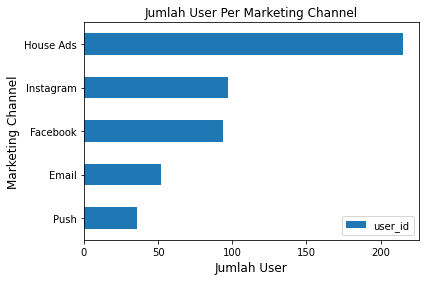

In [6]:
marketing_user = df.groupby("marketing_channel").agg({"user_id":"nunique"})
marketing_user.sort_values("user_id",ascending=True).plot(kind='barh').set_title("Jumlah User Per Marketing Channel",fontsize=12)
plt.xlabel("Jumlah User",fontsize=12)
plt.ylabel("Marketing Channel",fontsize=12)

Dilihat dari jumlah user yang direach melalui marketing channel, tertinggi sekitar 200 user terdapat dari house ads. Dan selanjutnya sekitar 100 user terdapat dari instagram dan facebook.

# Jumlah User Per Variant

Text(0, 0.5, 'Variant')

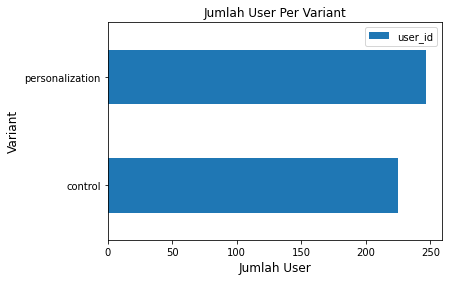

In [7]:
variant_user = df.groupby ("variant").agg({"user_id":"nunique"})
variant_user.sort_values("user_id",ascending=True).plot(kind='barh').set_title("Jumlah User Per Variant",fontsize=12)
plt.xlabel("Jumlah User",fontsize=12)
plt.ylabel("Variant",fontsize=12)

Dilihat dari variant iklan yang ada tersebut hampir 250 user adalah variant personalization dan 200 an user variant control. 

# Jumlah User Coverted Per Variant

Text(0, 0.5, 'Jumlah User')

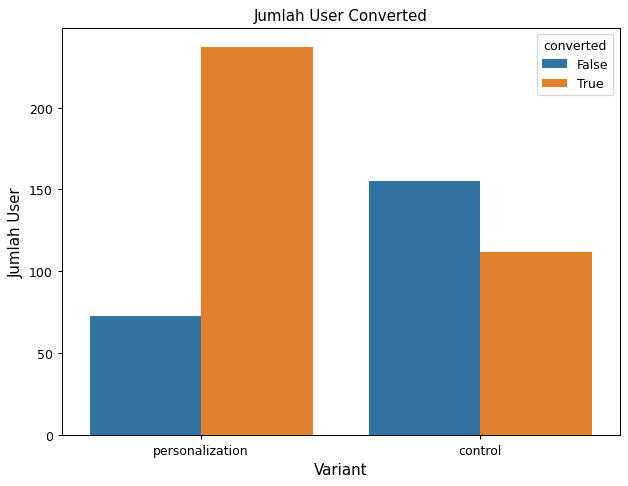

In [8]:
plt.figure(figsize=(8,6),dpi=90)
sns.countplot(data=df,x="variant",hue="converted").set_title("Jumlah User Converted",fontsize=12)
plt.xlabel("Variant",fontsize=12)
plt.ylabel("Jumlah User",fontsize=12)

Dilihat dari histogram yang telah di converted terjadi bahwa variant personalization lebih tinggi daripada variant control

# Jumlah User Converted Per Variant Dari Waktu Ke Waktu

In [9]:
df["date_subscribed"].unique()

array(['1/1/18', '1/2/18', '1/3/18', '1/4/18', '1/5/18', '1/6/18',
       '1/7/18', '1/8/18', '1/9/18', '1/10/18', '1/11/18', '1/12/18',
       '1/13/18', '1/14/18', '1/15/18', '1/16/18', '1/17/18', '1/18/18',
       '1/30/18', '1/31/18', '1/21/18', '1/22/18', '1/23/18', '1/24/18',
       '1/25/18', '1/26/18', '1/27/18', '1/28/18', '1/29/18', '1/19/18',
       '1/20/18'], dtype=object)

Karena dilihat tanggal yang ada memiliki bulan dan tahun yang sama maka akan di lihat melalui hari converted per variant dari waktu ke waktu

In [10]:
df["date_subscribed"] = pd.to_datetime(df['date_subscribed'],format="%m/%d/%y",infer_datetime_format=True)

Text(0, 0.5, 'Jumlah Converted')

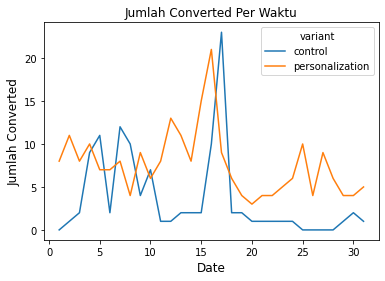

In [26]:
rate_subscribe = df[["date_subscribed","variant","converted"]].copy()
rate_subscribe['day'] = rate_subscribe["date_subscribed"].dt.day
rate_subscribe = rate_subscribe.groupby(["day","variant"],as_index=False)["converted"].sum()

#visual
sns.lineplot(data=rate_subscribe,x='day',y="converted",hue='variant').set_title("Jumlah Converted Per Waktu",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Jumlah Converted",fontsize=12)

Dilihat melalui grafik converted variant dari waktu ke waktu menunjukkan intensitas tertinggi pada variant personalization sekitar tanggal 16 dan variant control sekitar tanggal 18 yang dimana terjadi di waktu yang hampir sama.

# Jumlah User Converted Per Age Group

Text(0, 0.5, 'Age Group')

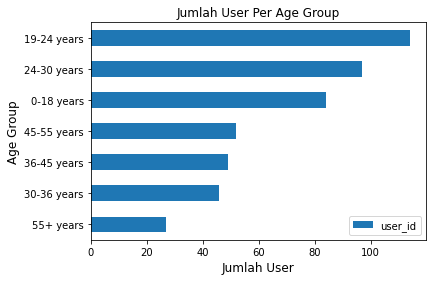

In [12]:
age_group = df.groupby("age_group").agg({"user_id":"nunique"})
age_group.sort_values("user_id",ascending=True).plot(kind='barh').set_title("Jumlah User Converted Per Age Group",fontsize=12)
plt.xlabel("Jumlah User",fontsize=12)
plt.ylabel("Age Group",fontsize=12)

Dilihat rata-rata umur pengguna user terbanyak terdapat di range usia 19-24 tahun lalu di range usia 24-30 tahun 

Text(0, 0.5, 'Jumlah')

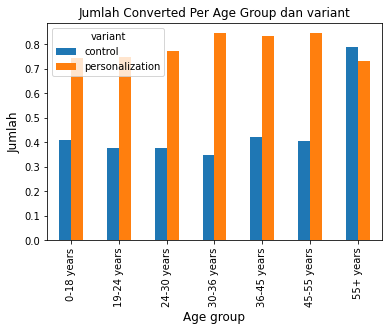

In [25]:
age_conversion = df.groupby(["age_group","variant"])["converted"].mean().unstack()
age_conversion.plot(kind="bar").set_title("Jumlah Converted Per Age Group dan variant",fontsize=12)
plt.xlabel("Age group",fontsize=12)
plt.ylabel("Jumlah",fontsize=12)

Jika dilihat setelah di converted sesuai kategori pengguna melalui rentang usia. Variant personalization rata-rata usia sekitar 30-36 tahun dan 45-55 tahun. Sementara variant control rata-rata usia sekitar 55 tahun ke atas.

# Korelasi Preferred Language dan Converted

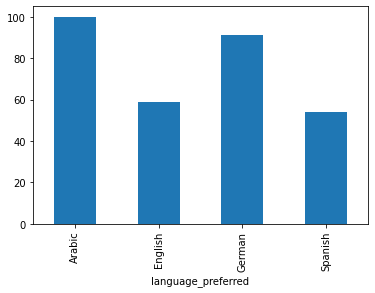

In [27]:
(df.groupby("language_preferred")["converted"].mean()*100).plot(kind="bar")

In [28]:
pd.pivot_table(df,index='language_preferred',columns="language_displayed",values="converted",aggfunc="mean").fillna(0)

language_displayed,Arabic,English,German,Spanish
language_preferred,,,,
Arabic,1.0,1.000000,0.0,0.0
English,0.0,0.587669,0.0,0.0
German,0.0,1.000000,0.9,0.0
Spanish,0.0,0.600000,0.0,0.5


Dilihat dari data tersebut bahwa languange preferred tertinggi ialah bahasa arabic. Tapi setelah di converted tetap bahasa english yang paling tinggi memiliki korelasi dengan bahasa yang lain. Karena dengan menampilkan iklan dalam bahasa english lebih mampu di mengerti dan diterima oleh semua user dari berbagai negara. Ditambah bahasa tersebut merupakan bahasa international pertama.

# A/B Testing

H0 : Tidak terdapat perbedaan significant antara iklan lama dan iklan baru

H1 : Terdapat perbedaan significant antara iklan lama dan iklan baru

In [31]:
# Menghitung conversion pada setiap variant

conv_calculation = df.groupby(
    ['variant', 'converted'], as_index = False
).size().pivot(
    index='variant', columns = "converted", values = "size"
).reset_index().assign(
    conv_percent = lambda x: x[True] * 100 / (x[True] + x[False])
).assign(
    total_sample = lambda x: x[True] + x[False]
)

In [33]:
# Check hasil perhitungan 
conv_calculation

converted,variant,False,True,conv_percent,total_sample
0,control,155,112,41.947566,267
1,personalization,73,237,76.451613,310


Menghitung uplift untuk variant personalization

In [34]:
conv_control = conv_calculation[conv_calculation['variant'] == 'control']['conv_percent'].values
conv_personalization = conv_calculation[conv_calculation['variant'] == 'personalization']['conv_percent'].values

In [35]:
(conv_personalization - conv_control)*100/conv_control

array([82.25518433])

Dilihat sebesar 82% ada efek peningkatan dengan menggunakan iklan baru daripada mengunakan iklan lama

In [36]:
# find number of succession
success = conv_calculation[['total_sample', True]].values[:,1]
# find number of all observations
obs = conv_calculation[['total_sample', True]].values[:,0]

In [37]:
result = proportions_chisquare(success, obs)

In [38]:
# Calculate chi squared result
print('X-squared: %.3f' % result[0])
print('p-value: %.3f' % result[1])

X-squared: 71.454
p-value: 0.000


Dari hasil tersebut dapat dikatakan bahwa :

1. Setelah di converted dan di uji AB testing adanya pengaruh dari iklan baru sebesar 76% dan iklan lama sebesar 41%
2. Ditambah uplift 82% relative terhadap perbandingan konversi iklan baru dengan iklan lama
3. Karena p-value < 0.05 maka hyphotesis bahwa iklan baru lebih efektif dapat diterima (H1)

# Rekomendasi

Berdasarkan hasil pengujian tersebut. Dapat dikatakan bahwa iklan baru memang lebih efektif dibandingkan iklan lama. Dilihat dari range usia pengguna dimulai sekitar 30-55 tahun.

Dimana insight yang bisa di berikan adalah:

Mengoptimalkan marketing channel pada instagram dan facebook . karena dari analisis menunjukkan bahwa marketing channel dengan user tertinggi terdapat melalui house ads. Tapi tidak di pungkiri dengan era digitalisasi instagram dan facebook dapat dioptimalkan untuk menaikkan user ditambah range usia masih masuk dalam marketing channel tersebut.

Lalu penggunaan bahasa untuk iklan yang mampu di mengerti oleh semua orang. Bukan hanya visualisasi yang bagus melainkan bahasa yang mampu di mengerti dan di terjemahkan oleh semua orang. Walaupun languange preferred tertinggi adalah bahasa arab. Tetapi menggunakan bahasa inggris untuk penerjemahan sangatlah efektif untuk meningkatkan dan memperluas jangkauan pada iklan yang baru. Karena bahasa inggris sendiri merupakan bahasa international.

Dan harus dipastikan iklan baru yang dibuat sesuai dengan reach usia yang di targetkan dan sesuai dengan target apa yang akan di promosikan. Agar semua bisa berjalan dengan optimal.

